In [2]:
from datasets.density_datasets import Datasets as DensityDatasets
from datasets.real_world_datasets import Datasets as RealWorldDatasets
from src.Evaluation.disco import disco_score as DISCO
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from tqdm import tqdm
colors = {
'blue'       : '#00549F',
'blue_75'    : '#407FB7',
'blue_50'    : '#8EBAE5',
'blue_25'    : '#C7DDF2',
'blue_10'    : '#E8F1FA',

'black'      : '#000000',
'black_75'   : '#646567',
'black_50'   : '#9C9E9F',
'black_25'   : '#CFD1D2',
'black_10'   : '#ECEDED',

'magenta'    : '#E30066',
'magenta_75' : '#E96088',
'magenta_50' : '#F19EB1',
'magenta_25' : '#F9D2DA',
'magenta_10' : '#FDEEF0',

'yellow'     : '#FFED00',
'yellow_75'  : '#FFF055',
'yellow_50'  : '#FFF59B',
'yellow_25'  : '#FFFAD1',
'yellow_10'  : '#FFFDEE',


'petrol'     : '#006165',
'petrol_75'  : '#2D7F83',
'petrol_50'  : '#7DA4A7',
'petrol_25'  : '#BFD0D1',
'petrol_10'  : '#E6ECEC',

'turquoise'    : '#0098A1',
'turquoise_75' : '#00B1B7',
'turquoise_50' : '#89CCCF',
'turquoise_25' : '#CAE7E7',
'turquoise_10' : '#EBF6F6',

'green'      : '#57AB27',
'green_75'   : '#8DC060',
'green_50'   : '#B8D698',
'green_25'   : '#DDEBCE',
'green_10'   : '#F2F7EC',

'lime'       : '#BDCD00',
'lime_75'    : '#D0D95C',
'lime_50'    : '#E0E69A',
'lime_25'    : '#F0F3D0',
'lime_10'    : '#F9FAED',

'orange'     : '#F6A800',
'orange_75'  : '#FABE50',
'orange_50'  : '#FDD48F',
'orange_25'  : '#FEEAC9',
'orange_10'  : '#FFF7EA',

'red'        : '#CC071E',
'red_75'     : '#D85C41',
'red_50'     : '#E69679',
'red_25'     : '#F3CDBB',
'red_10'     : '#FAEBE3',

'bordeaux'   : '#A11035',
'bordeaux_75': '#B65256',
'bordeaux_50': '#CD8B87',
'bordeaux_25': '#E5C5C0',
'bordeaux_10': '#F5E8E5',

'purple'     : '#612158',
'purple_75'  : '#834E75',
'purple_50'  : '#A8859E',
'purple_25'  : '#D2C0CD',
'purple_10'  : '#EDE5EA',

'lila'       : '#7A6FAC',
'lila_75'    : '#9B91C1',
'lila_50'    : '#BCB5D7',
'lila_25'    : '#DEDAEB',
'lila_10'    : '#F2F0F7',
}
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def run_multiple_mu(X, l):
    mu_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
    dict = {str(mu) : [] for mu in mu_list}
    for mu in mu_list:
        score = DISCO(X, l, mu)
        dict[str(mu)].append(round(score, 4))
    return dict


In [4]:
def run_multiple_synthetic_datasets(datasets):
    mu_list = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26,28,30,32]
    mu_list = [1,2,3,4,5,6,7,8,9,10]
    dataset_dict = {}
    for name in tqdm(datasets):
        if name == 'zelnik4':
            X, l= DensityDatasets.zelnik4.standardized_data_cached
        elif name == 'clutot4':
            X, l = DensityDatasets.cluto_t4_8k.standardized_data_cached
        elif name == 'clutot8':
            X, l = DensityDatasets.cluto_t8_8k.standardized_data_cached
        elif name == 'clutot5':
            X, l = DensityDatasets.cluto_t5_8k.standardized_data_cached
        elif name == 'clutot7':
            X, l = DensityDatasets.cluto_t7_10k.standardized_data_cached
        elif name == 'aggregation':
            X, l = DensityDatasets.aggregation.standardized_data_cached
        elif name == 'chainlink':
            X, l = DensityDatasets.chainlink.standardized_data_cached
        elif name == 'chainlink':
            X, l = DensityDatasets.chainlink.standardized_data_cached
        elif name == 'threespiral':
            X, l = DensityDatasets.three_spiral.standardized_data_cached
        elif name == 'complex9':
            X, l = DensityDatasets.complex9.standardized_data_cached
        elif name == 'complex8':
            X, l = DensityDatasets.complex8.standardized_data_cached
        elif name == 'compound':
            X, l = DensityDatasets.compound.standardized_data_cached
        elif name == 'dartboard1':
            X, l = DensityDatasets.dartboard1.standardized_data_cached
        elif name == 'diamond9':
            X, l = DensityDatasets.diamond9.standardized_data_cached
        elif name == 'smile1':
            X, l = DensityDatasets.smile1.standardized_data_cached
        else:
            print('Dataset {} not found'.format(name))

        scores = []
        for mu in mu_list:
            score = DISCO(X, l, mu)
            scores.append(round(score, 4))
        dataset_dict[name] = scores
    df = pd.DataFrame(dataset_dict, index = mu_list)
    return df

def run_multiple_realworld_datasets(datasets):

    mu_list = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26,28,30,32]
    dataset_dict = {}
    for name in tqdm(datasets):
        if name == 'Synth_low':
            X, l= RealWorldDatasets.Synth_low.standardized_data_cached
        elif name == 'Synth_high':
            X, l = RealWorldDatasets.Synth_high.standardized_data_cached
        elif name == 'HAR':
            X, l = RealWorldDatasets.HAR.standardized_data_cached
        elif name == 'letterrec':
            X, l = RealWorldDatasets.letterrec.standardized_data_cached
        elif name == 'htru2':
            X, l = RealWorldDatasets.htru2.standardized_data_cached
        elif name == 'Mice':
            X, l = RealWorldDatasets.Mice.standardized_data_cached
        elif name == 'Pendigits':
            X, l = RealWorldDatasets.Pendigits.standardized_data_cached
        elif name == 'COIL20':
            X, l = RealWorldDatasets.COIL20.standardized_data_cached
        elif name == 'COIL100':
            X, l = RealWorldDatasets.COIL100.standardized_data_cached
        elif name == 'Optdigits':
            X, l = RealWorldDatasets.Optdigits.standardized_data_cached
        elif name == 'cmu_faces':
            X, l = RealWorldDatasets.cmu_faces.standardized_data_cached
        else:
            print('Dataset {} not found'.format(name))

        scores = []
        for mu in mu_list:
            score = DISCO(X, l, mu)
            scores.append(round(score, 4))
        dataset_dict[name] = scores
    df = pd.DataFrame(dataset_dict, index = mu_list)
    return df

In [5]:
dataframe_synthetic = run_multiple_synthetic_datasets(['threespiral','aggregation','chainlink','clutot4','clutot7','clutot8','complex8','complex9','compound','dartboard1','diamond9','smile1'])


100%|██████████| 12/12 [01:02<00:00,  5.22s/it]


In [6]:
dataframe_rw = run_multiple_realworld_datasets(['Synth_low','Synth_high', 'htru2','Pendigits','COIL20','cmu_faces','Optdigits'])

100%|██████████| 7/7 [06:57<00:00, 59.66s/it]


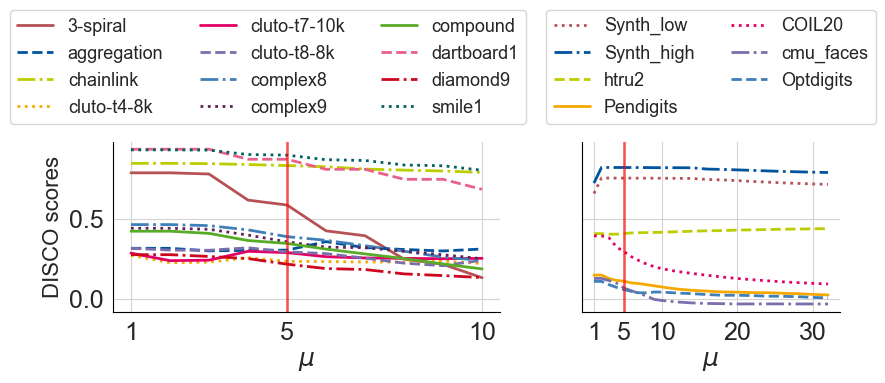

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Set seaborn style
#sns.set(style="whitegrid")

# Line styles and colors
line_styles = ['-', '--', '-.', ':']
line_styles2 = [':','-.','--','-'  ]
colors =  [colors["bordeaux_75"],colors["blue"] ,colors["lime"],colors["orange"],colors["magenta"],colors["lila"],colors["blue_75"],colors["purple"],colors["green"],colors["magenta_75"],colors["red"],colors["petrol"],colors["turquoise"]]

# Create subplots

fig,axes = plt.subplots(1,2,figsize=(9,4),sharey=True, width_ratios=[6,4],layout='constrained')

#ax1 = plt.subplot2grid((1, 7), (0, 0),colspan=3)
#ax2 = plt.subplot2grid((1, 7), (0, 4),colspan=3 )
#axes = [ax1, ax2]
dataframe_synthetic_selected = dataframe_synthetic[['threespiral','aggregation','chainlink','clutot4','clutot7','clutot8','complex8','complex9','compound','dartboard1','diamond9','smile1']]
dataframe_synthetic_selected = dataframe_synthetic_selected.rename(columns={'clutot4':'cluto-t4-8k','clutot7':'cluto-t7-10k','clutot8':'cluto-t8-8k','threespiral':'3-spiral'})
dataframe_rw_selected=dataframe_rw[['Synth_low','Synth_high', 'htru2','Pendigits','COIL20','cmu_faces','Optdigits']]

# Plot first dataframe
for i, col in enumerate(dataframe_synthetic_selected.columns):
    axes[0].plot(dataframe_synthetic_selected.index, dataframe_synthetic_selected[col],
                 label=col,
                 linestyle=line_styles[i % len(line_styles)],
                 color=colors[i % len(colors)],
                 linewidth=2)
axes[0].set_ylabel("DISCO scores", fontsize=16)
axes[0].set_xlabel(r"$\mu$", fontsize=18)
axes[0].tick_params(axis='both',labelsize=18)
axes[0].legend(loc='lower center',  bbox_to_anchor=(0.4, 1.05),ncol=3, fontsize=13, frameon=True)
axes[0].axvline(x=5, color='red', linestyle='-', linewidth=2, alpha=0.6)
axes[0].set_xticks([1, 5, 10], ['1', '5', '10'])
# Plot second dataframe
for i, col in enumerate(dataframe_rw_selected.columns):
    axes[1].plot(dataframe_rw_selected.index, dataframe_rw_selected[col],
                 label=col,
                 linestyle=line_styles2[i % len(line_styles2)],
                 color=colors[i % len(colors)],
                 linewidth=2)
axes[1].set_xlabel(r"$\mu$", fontsize=18)
axes[1].tick_params(axis='both', labelsize=18)
axes[1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=13, frameon=True)
axes[1].axvline(x=5, color='red', linestyle='-', linewidth=2, alpha=0.6)
axes[1].set_xticks([1, 5, 10,20,30], ['1', '5', '10','20','30'])

axes[0].set_facecolor("white")
axes[0].spines["bottom"].set_color("black")
axes[0].spines["left"].set_color("black")
axes[0].spines["right"].set_color("white")
axes[0].spines["top"].set_color("white")
axes[0].grid(color="lightgray")
axes[1].set_facecolor("white")
axes[1].spines["bottom"].set_color("black")
axes[1].spines["left"].set_color("black")
axes[1].spines["right"].set_color("white")
axes[1].spines["top"].set_color("white")
axes[1].grid(color="lightgray")

plt.tight_layout()
plt.savefig("imgs/AblationMinPts", format="png", bbox_inches="tight", pad_inches=0)
